**Model Regresi Sederhana**

In [4]:
from google.colab import drive
drive.mount('/content/gdive')

Mounted at /content/gdive


In [5]:
path = '/content/gdive/MyDrive/Praktikum/Praktikum03'

In [6]:
import pandas as pd
df = pd.read_csv(path + '/Data/socr.csv', sep=',')
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [8]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [9]:
df1 = (
df [["Height(Inches)", "Weight(Pounds)"]]
        .rename(columns={"Height(Inches)":"tinggi_cm",
                         "Weight(Pounds)": "berat_kg"})
.assign(
    tinggi_cm=lambda d: d["tinggi_cm"] * 2.54,        # in → cm
    berat_kg=lambda d: d["berat_kg"] * 0.45359237     # Lb → kg
    )
  .round({"tinggi_cm": 2, "berat_kg": 2})
).copy()

df1.head()

,tinggi_cm,berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


In [10]:
from sklearn.model_selection import train_test_split

X = df1[["tinggi_cm"]]
y = df1["berat_kg"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

X_train.head()

,tinggi_cm
3253,167.14
18789,178.49
4466,169.75
19269,181.97
6527,177.60


In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Koefisien (kg per cm):", model.coef_[0])
print("Intersep (kg):", model.intercept_)
print("R2 (test):", r2)
print("MAE (kg):", mean_absolute_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)      # default squared=True
rmse = np.sqrt(mse)
print("RMSE (kg):", rmse)

Koefisien (kg per cm): 0.5518232618278286
Intersep (kg): -37.657088783833586
R2 (test): 0.24989263013277574
MAE (kg): 3.6704107898943548
RMSE (kg): 4.609006140308042


In [13]:
slope = model.coef_[0]
intercept = model.intercept_
print(f"Persamaan: y = {slope: .3f} * x + {intercept:.3f}")

Persamaan: y =  0.552 * x + -37.657


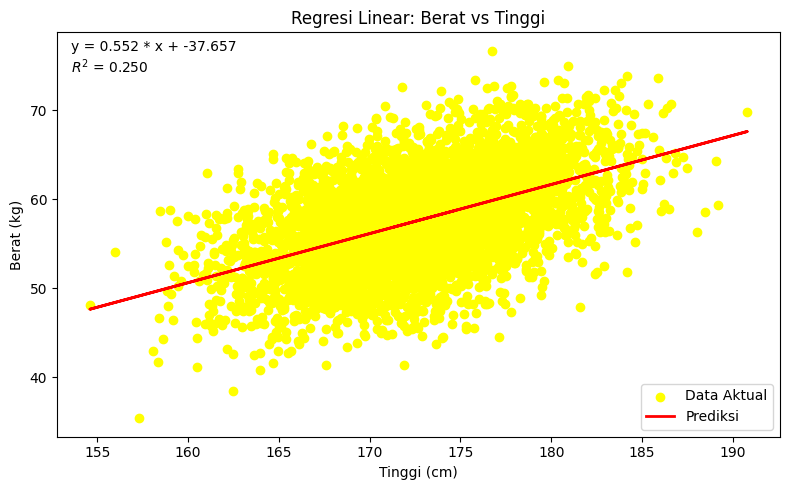

In [14]:
import matplotlib.pyplot as plt

#Plot data scatter
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color="yellow", label="Data Aktual")

#Garis regresi
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Prediksi")
plt.xlabel("Tinggi (cm)")
plt.ylabel("Berat (kg)")
plt.title("Regresi Linear: Berat vs Tinggi")
plt.text(
    0.02, 0.98,
    f"y = {slope:.3f} * x + {intercept:.3f}\n$R^2$ = {r2:.3f}",
    transform=plt.gca().transAxes, va="top"
)

plt.legend()
plt.tight_layout()
plt.show()

In [15]:
#Data testing dari mahasiswa TI

import pandas as pd
df = pd.read_csv(path + '/Data/berat_ti2022.csv', sep=',')
df.head()

,no,nama,tinggi_cm,actual_berat
0,1,Rafa,168,58.5
1,2,Tiara,162,78.2
2,3,Tia,155,52.7
3,4,Keyla,160,70.3
4,5,Bani,183,65.8


In [16]:
X_testing = df['tinggi_cm']
X_testing

,tinggi_cm
0,168
1,162
2,155
3,160
4,183


In [17]:
y_pred_testing = model.predict(df[['tinggi_cm']])
df['prediksi_kg'] = y_pred_testing
df["Selisih error (kg)"] = df["prediksi_kg"] - df["actual_berat"]
df

,no,nama,tinggi_cm,actual_berat,prediksi_kg,Selisih error (kg)
0,1,Rafa,168,58.5,55.049219,-3.450781
1,2,Tiara,162,78.2,51.738280,-26.461720
2,3,Tia,155,52.7,47.875517,-4.824483
3,4,Keyla,160,70.3,50.634633,-19.665367
4,5,Bani,183,65.8,63.326568,-2.473432


In [18]:
y_pred = model.predict(df[['tinggi_cm']])
df['prediksi_kg'] = y_pred
df["Selisih error (kg)"] = df["prediksi_kg"] - df["actual_berat"]
denom = df["actual_berat"].replace(0, np.nan)
df["Akurasi (%)"] = (1 - (df["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100
df

,no,nama,tinggi_cm,actual_berat,prediksi_kg,Selisih error (kg),Akurasi (%)
0,1,Rafa,168,58.5,55.049219,-3.450781,94.101229
1,2,Tiara,162,78.2,51.738280,-26.461720,66.161483
2,3,Tia,155,52.7,47.875517,-4.824483,90.845383
3,4,Keyla,160,70.3,50.634633,-19.665367,72.026505
4,5,Bani,183,65.8,63.326568,-2.473432,96.240985


In [19]:
y_pred_test = model.predict(X_test)

#Buat tabel hasil (tinggi, aktual, prediksi, dan error)
hasil = pd.DataFrame({
    "Tinggi (cm)": X_test ["tinggi_cm"].to_numpy(),
    "Berat aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test,
})

#1) Selisih error (positif = overpredict)
hasil ["Selisih error (kg)"] = hasil ["Berat Prediksi (kg)"] - hasil ["Berat aktual (kg)"]

#2) Akurasi per-baris (100 (1 /error//aktual)), dibatasi 0-100
denom = hasil["Berat aktual (kg)"].replace(0, np.nan) #antisipasi pembagi nol
hasil ["Akurasi (%)"] = (1 - (hasil ["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1)* 100

hasil

,Tinggi (cm),Berat aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
0,174.73,50.16,58.762990,8.602990,82.848904
1,171.31,50.33,56.875754,6.545754,86.994329
2,169.29,58.22,55.761071,-2.458929,95.776488
3,163.30,58.92,52.455650,-6.464350,89.028598
4,170.52,63.06,56.439814,-6.620186,89.501766
...,...,...,...,...,...
4995,178.75,56.59,60.981319,4.391319,92.240114
4996,163.05,47.45,52.317694,4.867694,89.741425
4997,166.51,52.46,54.227003,1.767003,96.631715
4998,167.70,49.90,54.883672,4.983672,90.012681


**Multiple Linear Regresi**

In [20]:
import pandas as pd
df = pd.read_csv(path + '/Data/stunting_wasting_dataset.csv', sep=',')
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [21]:
df.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000


In [22]:
df1 = (df[["Berat Badan (kg)", "Jenis Kelamin", "Umur (bulan)", "Tinggi Badan (cm)"]]
       .rename(columns={"Jenis Kelamin":"jk", "Umur (bulan)":"umur_bln",
                        "Tinggi Badan (cm)": "tinggi_cm", "Berat Badan (kg)": "berat_kg"}).copy())

df1["jk"] = df1["jk"].map({"Laki-laki": 1, "Perempuan": 0})
df1.head()

,berat_kg,jk,umur_bln,tinggi_cm
0,13.3,1,19,91.6
1,8.5,1,20,77.7
2,10.3,1,10,79.0
3,8.3,0,2,50.3
4,10.9,0,5,56.4


In [23]:
corr_matrix = df1.corr()
print(corr_matrix)

           berat_kg        jk  umur_bln  tinggi_cm
berat_kg   1.000000  0.045797  0.665389   0.626005
jk         0.045797  1.000000  0.004046   0.073505
umur_bln   0.665389  0.004046  1.000000   0.875869
tinggi_cm  0.626005  0.073505  0.875869   1.000000


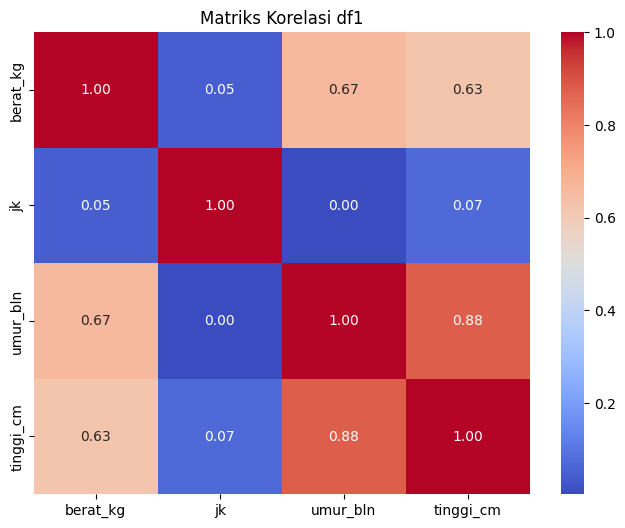

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi df1")

plt.show()

In [26]:
from sklearn.model_selection import train_test_split

#Misalkan target (Y) adalah berat badan, # Variabel dependen
y=df1["berat_kg"]

#Fitur (X) adalah umur dan tinggi, # Variabel independen
X=df1[["umur_bln", "tinggi_cm"]]

#Bagi data 80% train, 20% test
X_train, X_test, y_train, y_test=train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Jumlah data train:", len(X_train))
print("Jumlah data test", len(X_test))

X_train.head()

Jumlah data train: 80000
Jumlah data test 20000


,umur_bln,tinggi_cm
75220,2,51.9
48955,13,74.3
44966,17,86.7
13568,16,76.8
92727,20,78.5


In [28]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,umur_bln,tinggi_cm
75220,1.0,2,51.9
48955,1.0,13,74.3
44966,1.0,17,86.7
13568,1.0,16,76.8
92727,1.0,20,78.5


In [31]:
model = sm.OLS(y_train, X_train_const).fit()

print('--------------------')

print(model.params)

print('--------------------')

const = model.params['const']
x1_umur = model.params['umur_bln']
x2_tinggi = model.params['tinggi_cm']

#print persamaan regresi
print(f"y = {const:.3f} + {x1_umur:.3f}*x1 + {x2_tinggi:.3f}*x2")

--------------------
const        2.545617
umur_bln     0.229719
tinggi_cm    0.054192
dtype: float64
--------------------
y = 2.546 + 0.230*x1 + 0.054*x2


In [32]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               berat_kg   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                 3.272e+04
Date:                Sun, 12 Oct 2025   Prob (F-statistic):               0.00
Time:                        04:35:29   Log-Likelihood:            -1.8505e+05
No. Observations:               80000   AIC:                         3.701e+05
Df Residuals:                   79997   BIC:                         3.701e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5456      0.091     28.039      0.0

In [34]:
X_test_const = sm.add_constant(X_test)
y_pred_test = model.predict(X_test_const)

hasil = pd.DataFrame({
    "Umur (bulan)": X_test["umur_bln"].to_numpy(),
    "Tinggi (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat Aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test
})

hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat Aktual (kg)"]
denom = hasil["Berat Aktual (kg)"].replace(0, np.nan)
hasil ["Akurasi (%)"] = (1 - (hasil ["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1)*100

hasil

,Umur (bulan),Tinggi (cm),Berat Aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
75721,1,54.6,7.0,5.734226,-1.265774,81.917510
80184,8,66.0,12.2,7.960047,-4.239953,65.246290
19864,20,90.0,10.9,12.017284,1.117284,89.749692
76699,13,82.4,9.6,9.997392,0.397392,95.860500
92991,11,70.1,13.2,8.871391,-4.328609,67.207511
...,...,...,...,...,...,...
32595,9,67.3,11.8,8.260216,-3.539784,70.001830
29313,15,80.2,9.6,10.337607,0.737607,92.316595
37862,8,61.9,8.0,7.737860,-0.262140,96.723246
53421,12,74.9,5.4,9.361232,3.961232,26.643845
